In [1]:
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [43]:
memory_footprints = []

In [50]:
moma = pd.read_csv('moma.csv')
moma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34558 entries, 0 to 34557
Data columns (total 27 columns):
ExhibitionID              34129 non-null float64
ExhibitionNumber          34558 non-null object
ExhibitionTitle           34558 non-null object
ExhibitionCitationDate    34557 non-null object
ExhibitionBeginDate       34558 non-null object
ExhibitionEndDate         33354 non-null object
ExhibitionSortOrder       34558 non-null float64
ExhibitionURL             34125 non-null object
ExhibitionRole            34424 non-null object
ConstituentID             34044 non-null float64
ConstituentType           34424 non-null object
DisplayName               34424 non-null object
AlphaSort                 34424 non-null object
FirstName                 31499 non-null object
MiddleName                3804 non-null object
LastName                  31998 non-null object
Suffix                    157 non-null object
Institution               2458 non-null object
Nationality               26

In [29]:
chunk_itr = pd.read_csv('moma.csv', chunksize=250)

In [30]:
type(chunk_itr)

pandas.io.parsers.TextFileReader

In [44]:
chunk_itr = pd.read_csv('moma.csv', chunksize=250)
for chunk in chunk_itr:
    memory_footprints.append(chunk.memory_usage(deep=True).sum()/1048576)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,  94.,  37.]),
 array([ 0.07383919,  0.1022049 ,  0.1305706 ,  0.15893631,  0.18730202,
         0.21566772,  0.24403343,  0.27239914,  0.30076485,  0.32913055,
         0.35749626]),
 <a list of 10 Patch objects>)

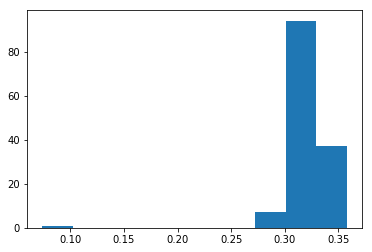

In [45]:
plt.hist(memory_footprints)

In [47]:
num_rows = 0
chunk_itr = pd.read_csv('moma.csv', chunksize=250)
for chunk in chunk_itr:
    num_rows += len(chunk)

In [48]:
num_rows

34558

In [79]:
life_spans = []
dtypes = {'ConstituentBeginDate':'float',
         'ConstituentEndDate':'float'}
moma_itr = pd.read_csv('moma.csv', chunksize=250, dtype=dtypes)
for chunk in moma_itr:
    span = chunk['ConstituentEndDate'] - chunk['ConstituentBeginDate']
    life_spans.append(span)
lifespans_dist = pd.concat(life_spans)

In [80]:
lifespans_dist

0        79.0
1        67.0
2        55.0
3        37.0
4        32.0
5        74.0
6        52.0
7        41.0
8        85.0
9        65.0
10       85.0
11       66.0
12       89.0
13       72.0
14       64.0
15       66.0
16       83.0
17       76.0
18       99.0
19       45.0
20       80.0
21       79.0
22       80.0
23       80.0
24       80.0
25       81.0
26       98.0
27       90.0
28       56.0
29       74.0
         ... 
34528    44.0
34529    89.0
34530    87.0
34531    37.0
34532    88.0
34533    80.0
34534     NaN
34535     NaN
34536    80.0
34537    77.0
34538     NaN
34539     NaN
34540    82.0
34541     NaN
34542     NaN
34543     NaN
34544     NaN
34545     NaN
34546     NaN
34547     NaN
34548     NaN
34549    72.0
34550     NaN
34551     NaN
34552     NaN
34553     NaN
34554     NaN
34555     NaN
34556     NaN
34557     NaN
dtype: float64

{'ConstituentBeginDate': 'float', 'ConstituentEndDate': 'float'}

In [86]:
overall_vc = []
chunk_iter = pd.read_csv("moma.csv", chunksize=250, usecols=['Gender'])
for chunk in chunk_iter:
    overall_vc.append(chunk['Gender'].value_counts())

In [88]:
#pd.concat(overall_vc)

In [101]:
overall_vc = []
chunk_iter = pd.read_csv("moma.csv", chunksize=250, usecols=['Gender'])
for chunk in chunk_iter:
    overall_vc.append(chunk['Gender'].value_counts())
combined_vc = pd.concat(overall_vc)

final_vc  = combined_vc.groupby(combined_vc.index).sum()

    

In [102]:
final_vc

Female     2527
Male      23268
male          1
Name: Gender, dtype: int64

In [22]:
moma_itr = pd.read_csv('moma.csv', usecols=['Gender', 'ExhibitionID'], chunksize=100)
list_of_gender_counts=[]
for chunk in moma_itr:
    list_of_gender_counts.append(chunk['Gender'].groupby(chunk['ExhibitionID']).value_counts())
combined_gender  = pd.concat(list_of_gender_counts)

id_gender_counts = combined_gender.groupby(combined_gender.index).sum()
    

(2.0, Male)            1
(5.0, Male)            3
(6.0, Female)          2
(6.0, Male)           32
(7.0, Male)           69
(9.0, Male)            4
(10.0, Male)           2
(15.0, Male)           1
(17.0, Male)           4
(19.0, Male)           2
(25.0, Male)           3
(26.0, Male)           3
(29.0, Male)           2
(33.0, Male)           5
(35.0, Male)           5
(79.0, Female)        18
(79.0, Male)         120
(80.0, Female)         7
(80.0, Male)          36
(84.0, Male)           2
(85.0, Male)           5
(89.0, Male)           1
(90.0, Male)           2
(92.0, Male)           8
(94.0, Male)          12
(102.0, Female)        1
(102.0, Male)          4
(103.0, Male)          3
(107.0, Male)          2
(114.0, Male)          1
                    ... 
(10550.0, Male)       24
(10551.0, Female)      6
(10551.0, Male)       28
(10552.0, Female)      4
(10552.0, Male)       21
(10553.0, Female)      3
(10553.0, Male)       35
(10554.0, Female)      4
(10554.0, Male)       18
